In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
import mpld3
import matplotlib
mpld3.enable_notebook()

In [2]:
tgpu=np.load('gpu_numba.npy')
tnumba=np.load('cpu_numba.npy')
tcpu=np.load('cpu.npy')
Mx_ls = [20,50,90, 128, 170,250, 350, 450, 500]

In [9]:
n_groups = 9

mean_numba = tnumba[:,0]
std_numba = tnumba[:,1]
mean_numbagpu = tgpu[:,0]
std_numbagpu = tgpu[:,1]

means_cpu = tcpu
std_cpu = np.zeros(len(tnumba[:,1]))

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, mean_numba, bar_width,
                alpha=opacity, color='b',
                yerr=std_numba, error_kw=error_config,
                label='Numba')

rects2 = ax.bar(index + bar_width, means_cpu, bar_width,
                alpha=opacity, color='r',
                yerr=std_cpu, error_kw=error_config,
                label='CPU')

ax.set_xlabel('Detector Dimension X')
ax.set_ylabel('Time(s)')
ax.set_title('Numba vs CPU')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('20','50','90', '128', '170','250', '350', '450', '500'))
ax.legend()

fig.tight_layout()
labels1 = [f'Time {i:.02f}s' for i in mean_numba]
labels2 = [f'Time {i:.02f}s' for i in means_cpu]

#tooltip1 = mpld3.plugins.PointLabelTooltip(rects1, labels=labels1)
#mpld3.plugins.connect(fig, tooltip1)
#tooltip2 = mpld3.plugins.PointLabelTooltip(rects2, labels=labels2)
#mpld3.plugins.connect(fig, tooltip2)


mpld3.display(fig)

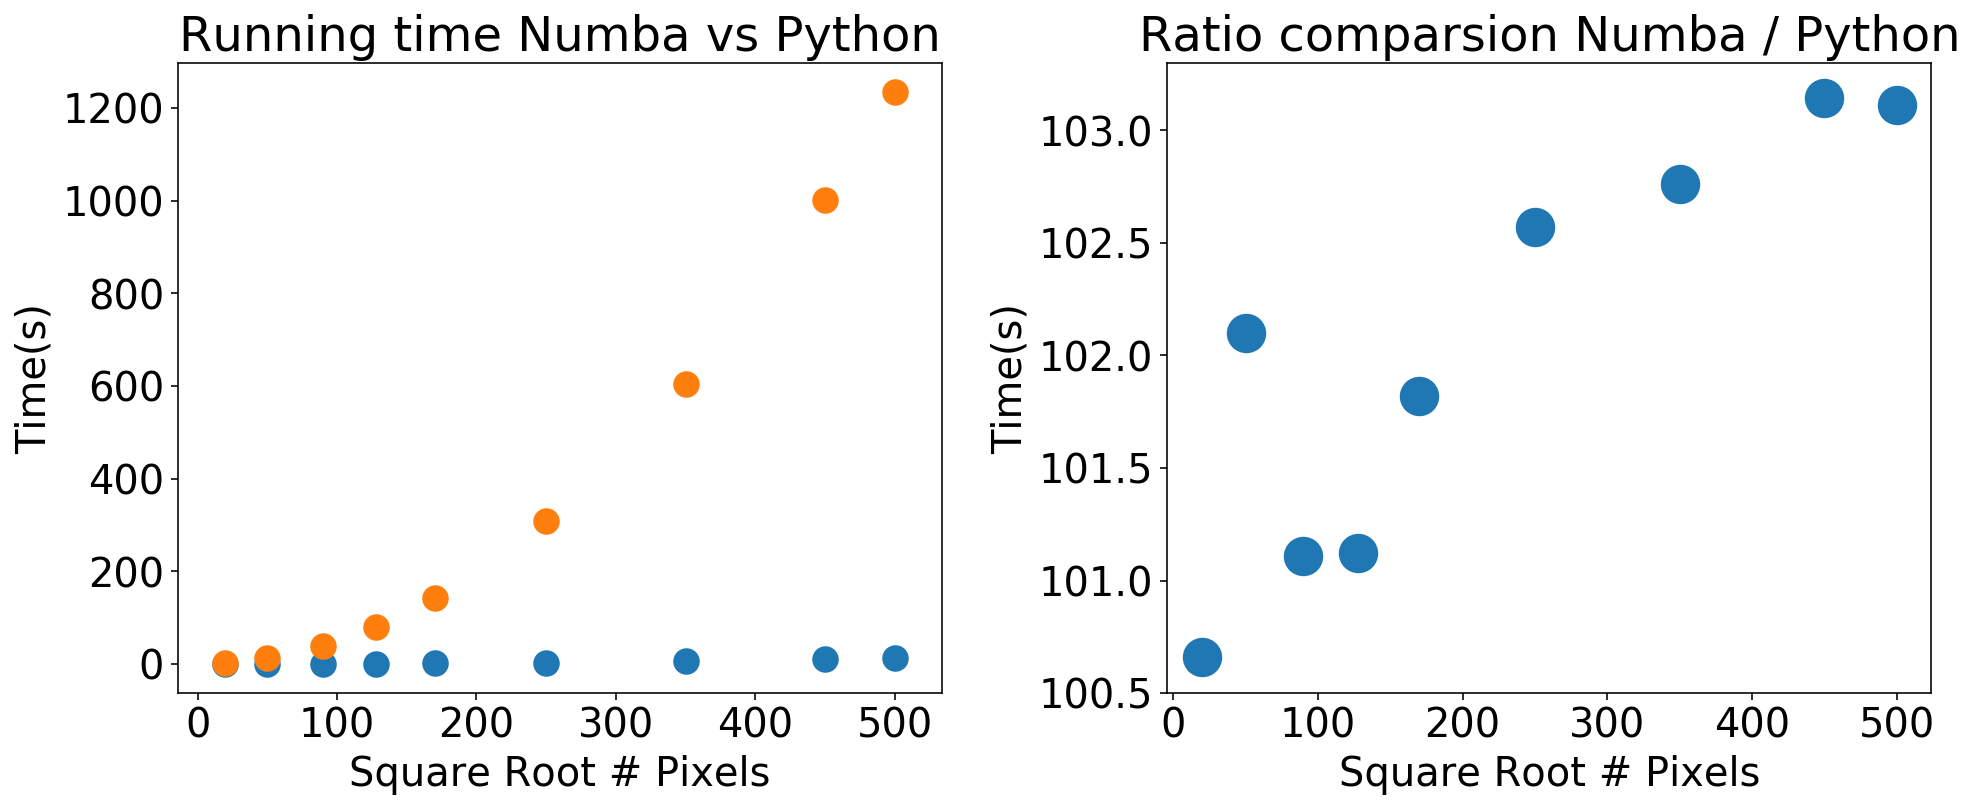

In [78]:
%config InlineBackend.figure_format = 'retina'
#fig=plt.figure(figsize=(8, 6), dpi= 120, facecolor='w', edgecolor='k')
matplotlib.rcParams.update({'font.size': 20})
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
plt.subplot(1,2,1)
s1=plt.scatter(Mx_ls,mean_numba, s=150)
s2=plt.scatter(Mx_ls,means_cpu, s=150)
plt.xlabel('Square Root # Pixels')
plt.ylabel('Time(s)')
plt.title('Running time Numba vs Python')
plt.tight_layout()
labels1 = [f'<h3>Time {i:.02f}s<h3>' for i in  mean_numba]
tooltip1 = mpld3.plugins.PointHTMLTooltip(s1, labels=labels1, voffset=-70, hoffset=-50)
labels2 = [f'<h3>Time {i:.02f}s<h3>' for i in means_cpu]
tooltip2 = mpld3.plugins.PointHTMLTooltip(s2, labels=labels2, voffset=-70, hoffset=-50)
mpld3.plugins.connect(fig, tooltip1,tooltip2)
plt.subplot(1,2,2)

s1=plt.scatter(Mx_ls, means_cpu/mean_numba, s=350)
plt.xlabel('Square Root # Pixels')
plt.ylabel('Time(s)')
plt.title('Ratio comparsion Numba / Python')
plt.tight_layout()
labels1 = [f'<h3>Ratio {i:.02f}<h3>' for i in means_cpu/mean_numba]
tooltip1 = mpld3.plugins.PointHTMLTooltip(s1, labels=labels1, voffset=-70, hoffset=-50)
mpld3.plugins.connect(fig, tooltip1)


mpld3.save_html(fig, open('scatter_numbapython.html', 'w'))

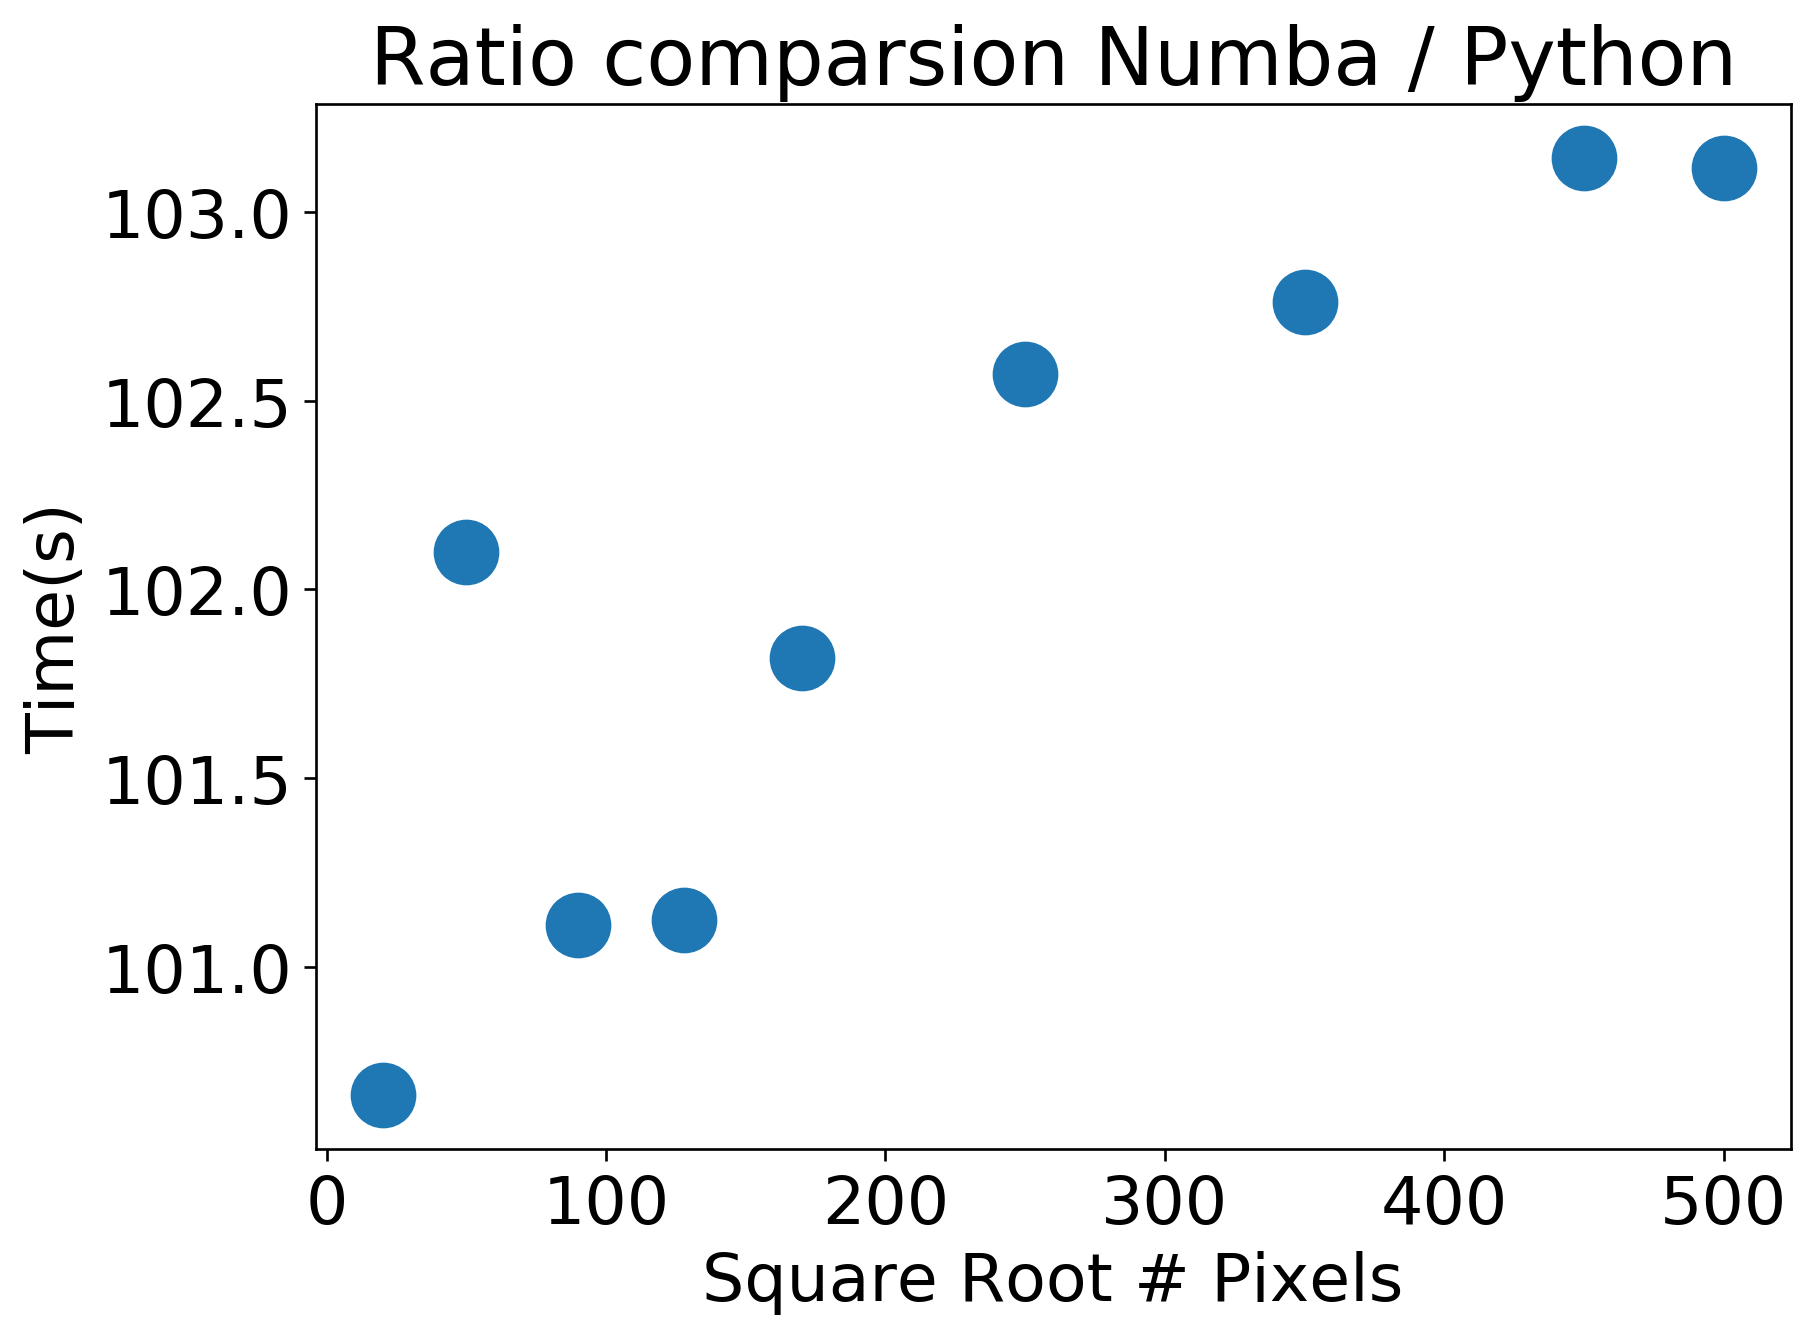

In [63]:
matplotlib.rcParams.update({'font.size': 20})
fig=plt.figure(figsize=(8, 6), dpi= 120, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)

s1=ax.scatter(Mx_ls, means_cpu/mean_numba, s=350)
plt.xlabel('Square Root # Pixels')
plt.ylabel('Time(s)')
plt.title('Ratio comparsion Numba / Python')
plt.tight_layout()
labels1 = [f'<h3>Ratio {i:.02f}<h3>' for i in means_cpu/mean_numba]

tooltip1 = mpld3.plugins.PointHTMLTooltip(s1, labels=labels1, voffset=-70, hoffset=-50)
mpld3.plugins.connect(fig, tooltip1)

mpld3.save_html(fig, open('scatter_ratio.html', 'w'))